In [23]:
import pandas as pd
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

pwdir=%pwd
os.chdir(pwdir)

df = pd.read_csv('data.csv')


In [24]:
df=df.drop('笑顔度',axis=1)
df=df.drop('得票数',axis=1)
df=df.drop('年齢',axis=1)

In [25]:
'''
df.loc[df['当落'] == '落選','当落'] = 0
df.loc[df['当落'] == '当選','当落'] = 1
df.loc[df['性別'] == '男','性別'] = 0
df.loc[df['性別'] == '女','性別'] = 1
'''
#与党3
#都民ファースト2
#国政政党1
#無0


"\ndf.loc[df['当落'] == '落選','当落'] = 0\ndf.loc[df['当落'] == '当選','当落'] = 1\ndf.loc[df['性別'] == '男','性別'] = 0\ndf.loc[df['性別'] == '女','性別'] = 1\n"

In [26]:
X = df.drop('当落', axis=1)
y = df['当落']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

drop_coloums=['名字','名前','漢字名字','漢字名前']

train_name = X_train.loc[:, drop_coloums]
test_name = X_test.loc[:, drop_coloums]
X_train = X_train.drop(drop_coloums, axis=1)
X_test = X_test.drop(drop_coloums, axis=1)

In [27]:
print(df['性別'])

0      0
1      0
2      0
3      1
4      1
      ..
266    1
267    1
268    0
269    0
270    0
Name: 性別, Length: 271, dtype: int64


In [28]:
model = lgb.LGBMClassifier()

model.fit(X_train, y_train)

# テストデータの予測
Y_pred = model.predict(X_test)


/Users/rei/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


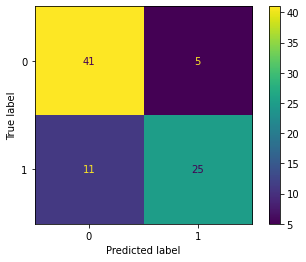

In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
plot_confusion_matrix(model, X_test, y_test)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=Y_pred))


confusion matrix = 
 [[41  5]
 [11 25]]
accuracy =  0.8048780487804879
precision =  0.8333333333333334
recall =  0.6944444444444444
f1 score =  0.7575757575757577


In [31]:
importance = pd.DataFrame(model.feature_importances_,
                          index=X_train.columns, columns=['importance'])
display(importance.sort_values('importance', ascending=0))


,importance
7月4日,126
7月3日,61
所属,60
6月26日,54
現職,50
6月29日,47
6月30日,42
6月27日,38
6月28日,34
選挙区,34


In [32]:
df_1=df[df['当落']==1]
df_0=df[df['当落']==0]

In [33]:
print('平均年齢')
print(df['年齢'].mean())
print(df_1['年齢'].mean())
print(df_0['年齢'].mean())

平均年齢


KeyError: '年齢'